## Import libraries

In [1]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Load dataset

In [2]:
df = woo.data("rdchem")
df.head()

,rd,sales,profits,rdintens,profmarg,salessq,lsales,lrd
0,430.600006,4570.200195,186.899994,9.421906,4.089536,2.088673e+07,8.427312,6.065180
1,59.000000,2830.000000,467.000000,2.084806,16.501766,8.008900e+06,7.948032,4.077538
2,23.500000,596.799988,107.400002,3.937668,17.995979,3.561702e+05,6.391582,3.157000
3,3.500000,133.600006,-4.300000,2.619760,-3.218563,1.784896e+04,4.894850,1.252763
4,1.700000,42.000000,8.000000,4.047619,19.047619,1.764000e+03,3.737670,0.530628


## (i) Theoretical model with constant elasticity

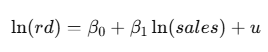

β1 is the elasticity of $rd$ with respect to s$ales$.

a 1% increase in $sales$ is associated, on average, with a β1% increase in $rd$ spending.

## (ii) Estimating the model with rdchem data

In [3]:
# Log transform
df['ln_rd'] = np.log(df['rd'])
df['ln_sales'] = np.log(df['sales'])

# Define dependent and independent variables
y = df['ln_rd']
X = sm.add_constant(df['ln_sales'])

# Estimate the log-log regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

# Extract elasticity (coefficient on ln_sales)
elasticity = model.params["ln_sales"]
print(f"Estimated elasticity of rd with respect to sales: {elasticity:.3f}")

                            OLS Regression Results                            
Dep. Variable:                  ln_rd   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           3.20e-17
Time:                        16:15:26   Log-Likelihood:                -24.021
No. Observations:                  32   AIC:                             52.04
Df Residuals:                      30   BIC:                             54.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1047      0.453     -9.066      0.0

This means that, other things being equal, a 1% increase in $sales$ is associated, on average, with a 1.076% increase in $rd$ spending.